In [3]:
import pandas as pd
import networkx as nx

# Freundschaftsdaten laden
friends_df = pd.read_csv('friends.csv', delimiter=',', header=None, comment='#', on_bad_lines='skip')
friends_df = friends_df.dropna()
# Netzwerk erstellen
G = nx.Graph()
G.add_edges_from(friends_df.values)
print(f"Netzwerk erstellt: {G.number_of_nodes()} Knoten, {G.number_of_edges()} Kanten")

# Validierung
print("Erste 5 Freundschaftsverbindungen:")
print(friends_df.head())
print("Letzte 5 Freundschaftsverbindungen:")
print(friends_df.tail())


Netzwerk erstellt: 8311 Knoten, 55483 Kanten
Erste 5 Freundschaftsverbindungen:
     0     1
0  360  4719
1  360  4720
2  360  4721
3  360  4722
4  360    14
Letzte 5 Freundschaftsverbindungen:
          0     1
55478  3926  6433
55479  2970  2922
55480  7793   581
55481  3329   241
55482  5117  4718


In [4]:
# Präferenzdaten laden
with open('preferences.json', 'r') as f:
    preferences_dict = json.load(f)

# Präferenzdaten in DataFrame umwandeln
preferences_df = pd.DataFrame.from_dict(preferences_dict, orient='index', columns=['preferences'])
preferences_df['preferences'] = preferences_df['preferences'].apply(lambda x: [int(bit) for bit in x])

# Index in Integer umwandeln
preferences_df.index = preferences_df.index.astype(int)

# Überprüfen, ob Benutzer 0 jetzt im Index ist
print(f"Präferenzdaten geladen: {len(preferences_df)} Benutzer")
print("Erste Zeilen der Präferenz-DataFrame:")
print(preferences_df.head())

if 0 in preferences_df.index:
    print("Beispielpräferenzen für Benutzer 0:")
    print(preferences_df.loc[0, 'preferences'])
else:
    print("Benutzer 0 nicht im Index. Verfügbare IDs:")
    print(preferences_df.index[:5].tolist())


NameError: name 'json' is not defined

In [ ]:
# Genres laden
with open('preferences_description.txt', 'r') as f:
    genres = [line.strip() for line in f.readlines() if not line.startswith("#")]
print(f"Genres geladen: {len(genres)} Genres")
print("Erste Genres:", genres[:5])

# Konzertdaten laden
concerts_df = pd.read_csv('n_concerts.txt', delimiter=":", header=None, engine='python', comment='#')
concerts_df.columns = ['Genre', 'Anzahl']
concerts_df['Anzahl'] = concerts_df['Anzahl'].astype(int)

# Hochrisiko-Genres definieren
threshold = 24
high_risk_genres = concerts_df[concerts_df['Anzahl'] >= threshold]['Genre'].tolist()
high_risk_indices = [genres.index(genre) for genre in high_risk_genres]
print(f"Hochrisiko-Genres (Schwellenwert {threshold}): {high_risk_genres}")


Genres geladen: 84 Genres
Erste Genres: ['Classical', 'Folk', 'Jazz Hip Hop', 'Electro Pop/Electro Rock', 'Dancefloor']
Hochrisiko-Genres (Schwellenwert 24): ['Classical', 'Electro Pop/Electro Rock', 'Dancefloor', 'Indie Rock/Rock pop', 'Singer & Songwriter', 'Indie Rock', 'Indie Pop', 'Spirituality & Religion', 'R&B', 'Pop', 'International Pop', 'Kids & Family', 'Rap/Hip Hop', 'Techno/House', 'Contemporary R&B']


In [ ]:
# Benutzer mit Hochrisiko-Präferenzen
high_risk_users = set(preferences_df.index[preferences_df['preferences'].apply(
    lambda x: any(x[i] == 1 for i in high_risk_indices)
)])
print(f"Benutzer mit Hochrisiko-Präferenzen: {len(high_risk_users)}")

# Benutzeranzahl pro Hochrisiko-Genre
high_risk_users_per_genre = {}
for genre, index in zip(high_risk_genres, high_risk_indices):
    users = preferences_df.index[preferences_df['preferences'].apply(lambda x: x[index] == 1)].tolist()
    high_risk_users_per_genre[genre] = users
    print(f"Genre: {genre}, Anzahl Benutzer: {len(users)}")


Benutzer mit Hochrisiko-Präferenzen: 2410
Genre: Classical, Anzahl Benutzer: 16
Genre: Electro Pop/Electro Rock, Anzahl Benutzer: 58
Genre: Dancefloor, Anzahl Benutzer: 44
Genre: Indie Rock/Rock pop, Anzahl Benutzer: 1891
Genre: Singer & Songwriter, Anzahl Benutzer: 2
Genre: Indie Rock, Anzahl Benutzer: 16
Genre: Indie Pop, Anzahl Benutzer: 0
Genre: Spirituality & Religion, Anzahl Benutzer: 0
Genre: R&B, Anzahl Benutzer: 99
Genre: Pop, Anzahl Benutzer: 21
Genre: International Pop, Anzahl Benutzer: 56
Genre: Kids & Family, Anzahl Benutzer: 10
Genre: Rap/Hip Hop, Anzahl Benutzer: 1362
Genre: Techno/House, Anzahl Benutzer: 429
Genre: Contemporary R&B, Anzahl Benutzer: 622


In [ ]:
# Degree Centrality berechnen
degree_centrality = nx.degree_centrality(G)

# Top 12% Benutzer
num_top_users = int(len(G.nodes) * 0.12)
top_central_users = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:num_top_users]
print(f"Top 12% Benutzer basierend auf Degree Centrality: {len(top_central_users)}")


Top 12% Benutzer basierend auf Degree Centrality: 997


In [ ]:
# Kombiniere Benutzer aus Degree Centrality und Hochrisiko-Präferenzen
prioritized_users = set(top_central_users) | high_risk_users
prioritized_users = list(prioritized_users)[:997]

print(f"Priorisierte Benutzer (kombiniert): {len(prioritized_users)}")

# Ergebnisse speichern
with open('prioritized_users.txt', 'w') as f:
    for user in prioritized_users:
        f.write(f"{user}\n")
print("Datei 'prioritized_users.txt' erstellt")


Priorisierte Benutzer (kombiniert): 997
Datei 'prioritized_users.txt' erstellt


In [ ]:
with open("b_team_5.txt", "r") as f:
    b_team_users = [line.strip() for line in f.readlines()]
print(f"Anzahl der Benutzer in b_team_5.txt: {len(b_team_users)}")
print(f"Erste 10 Benutzer: {b_team_users[:10]}")


Anzahl der Benutzer in b_team_5.txt: 997
Erste 10 Benutzer: ['1612', '1197', '1210', '419', '160', '2894', '1315', '3543', '312', '855']


In [ ]:
# Benutzer priorisieren, die Hochrisiko-Genres mögen
prioritized_users = sorted(
    high_risk_users,
    key=lambda user: len(list(G.neighbors(int(user)))),  # Grad (Netzwerkverbindungen)
    reverse=True
)[:997]

# Datei aktualisieren
with open("b_team_5.txt", "w") as f:
    for user in prioritized_users:
        f.write(f"{user}\n")

print(f"Neue Anzahl Hochrisiko-Benutzer in b_team_5.txt: {len(set(prioritized_users) & set(high_risk_users))}")


Neue Anzahl Hochrisiko-Benutzer in b_team_5.txt: 997


In [ ]:
# Hochrisiko-Benutzer erneut berechnen
high_risk_users = set(preferences_df.index[preferences_df['preferences'].apply(
    lambda x: any(x[i] == 1 for i in high_risk_indices)
)])
print(f"Anzahl Hochrisiko-Benutzer: {len(high_risk_users)}")


Anzahl Hochrisiko-Benutzer: 2410


In [ ]:
# Kombinierte Priorisierung
combined_scores = {
    user: len(list(G.neighbors(int(user)))) + 1000 * (user in high_risk_users)
    for user in G.nodes
}

prioritized_users = sorted(
    combined_scores,
    key=combined_scores.get,
    reverse=True
)[:997]

with open("b_team_5.txt", "w") as f:
    for user in prioritized_users:
        f.write(f"{user}\n")

# Validierung
high_risk_in_b_team = len(set(prioritized_users) & set(high_risk_users))
print(f"Anzahl Hochrisiko-Benutzer in b_team_5.txt: {high_risk_in_b_team}/{len(prioritized_users)}")


Anzahl Hochrisiko-Benutzer in b_team_5.txt: 997/997


In [ ]:
# Durchschnittliche Verbindungen berechnen
all_users_avg_connections = sum(len(list(G.neighbors(user))) for user in G.nodes) / len(G.nodes)
prioritized_avg_connections = sum(len(list(G.neighbors(int(user)))) for user in prioritized_users) / len(prioritized_users)

print(f"Durchschnittliche Verbindungen (Netzwerk): {all_users_avg_connections}")
print(f"Durchschnittliche Verbindungen (b_team_5): {prioritized_avg_connections}")


Durchschnittliche Verbindungen (Netzwerk): 13.351702562868487
Durchschnittliche Verbindungen (b_team_5): 22.68505516549649


In [ ]:
# Risiko berechnen
all_users_risk = sum(
    (393 if user in high_risk_users else 18) * len(list(G.neighbors(user)))
    for user in G.nodes
) / len(G.nodes)

b_team_risk = sum(
    (393 if int(user) in high_risk_users else 18) * len(list(G.neighbors(int(user))))
    for user in prioritized_users
) / len(prioritized_users)

print(f"Durchschnittliches Risiko (Netzwerk): {all_users_risk}")
print(f"Durchschnittliches Risiko (b_team_5): {b_team_risk}")


Durchschnittliches Risiko (Netzwerk): 1649.9985561304295
Durchschnittliches Risiko (b_team_5): 8915.226680040121


In [ ]:
import random

def simulate_spread(G, vaccinated_users, steps=10):
    infected = set([random.choice(list(G.nodes))])  # Start mit einem zufälligen Infizierten
    for step in range(steps):
        new_infected = set()
        for node in infected:
            for neighbor in G.neighbors(node):
                if neighbor not in vaccinated_users and neighbor not in infected:
                    if random.random() < 0.5:  # Beispiel: Infektionswahrscheinlichkeit
                        new_infected.add(neighbor)
        infected.update(new_infected)
    return len(infected)

simulated_infected = simulate_spread(G, set(prioritized_users))
print(f"Simulierte Anzahl infizierter Benutzer nach 10 Schritten: {simulated_infected}")


Simulierte Anzahl infizierter Benutzer nach 10 Schritten: 7205


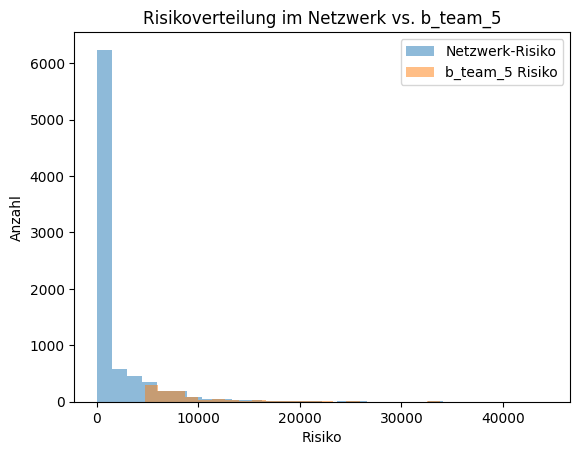

In [ ]:
import matplotlib.pyplot as plt

# Risiko aller Benutzer
all_users_risks = [
    (393 if user in high_risk_users else 18) * len(list(G.neighbors(user)))
    for user in G.nodes
]

# Risiko priorisierter Benutzer
b_team_risks = [
    (393 if int(user) in high_risk_users else 18) * len(list(G.neighbors(int(user))))
    for user in prioritized_users
]

plt.hist(all_users_risks, bins=30, alpha=0.5, label="Netzwerk-Risiko")
plt.hist(b_team_risks, bins=30, alpha=0.5, label="b_team_5 Risiko")
plt.xlabel("Risiko")
plt.ylabel("Anzahl")
plt.legend()
plt.title("Risikoverteilung im Netzwerk vs. b_team_5")
plt.show()

In [ ]:
# Dateien laden
a_team_file = "a_team_5.txt"
b_team_file = "b_team_5.txt"

# Benutzer-IDs aus beiden Dateien einlesen
with open(a_team_file, "r") as file:
    a_team_users = set(line.strip() for line in file)

with open(b_team_file, "r") as file:
    b_team_users = set(line.strip() for line in file)

# Gemeinsamkeiten und Unterschiede berechnen
common_users = a_team_users & b_team_users  # Schnittmenge
only_in_a = a_team_users - b_team_users  # Nur in a_team
only_in_b = b_team_users - a_team_users  # Nur in b_team

# Ergebnisse ausgeben
print(f"Anzahl Benutzer in a_team: {len(a_team_users)}")
print(f"Anzahl Benutzer in b_team: {len(b_team_users)}")
print(f"Gemeinsame Benutzer: {len(common_users)}")
print(f"Nur in a_team: {len(only_in_a)}")
print(f"Nur in b_team: {len(only_in_b)}")



Anzahl Benutzer in a_team: 997
Anzahl Benutzer in b_team: 997
Gemeinsame Benutzer: 521
Nur in a_team: 476
Nur in b_team: 476
